In [1]:
import os

In [ ]:
!cd /Users/xuydo/.kaggle/ && dir

In [ ]:
!kaggle datasets list -s 'titanic'

In [ ]:
!kaggle datasets download -d 'shravanbangera/output'

In [ ]:
!kaggle competitions list

In [ ]:
!kaggle datasets list -s 'titanic'

In [ ]:
!kaggle competitions download -c titanic

In [1]:
import zipfile
path_to_zip_file = 'titanic.zip'


def extract_zip(file = path_to_zip_file):
    with zipfile.ZipFile(file, 'r') as zip_ref:
        print(zip_ref.namelist())
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall()

In [2]:
extract_zip()

['gender_submission.csv', 'test.csv', 'train.csv']


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

strat_train = pd.read_csv("./train.csv")
strat_test = pd.read_csv("./test.csv")
strat_gender = pd.read_csv("./gender_submission.csv")

In [44]:
combine_df = [strat_train, strat_test]

In [45]:
set(strat_train.columns)-set(strat_test.columns)

{'Survived'}

In [46]:
strat_train.info()
print("_"*40)
strat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [47]:
strat_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",male,1601,G6,S
freq,1,577,7,4,644


In [48]:
for data in combine_df:
    data.drop(labels=["PassengerId", "Ticket"], axis=1, inplace=True)

In [49]:
df_train = strat_train.copy()
df_test = strat_test.copy()

In [50]:
cols_with_missing = [col for col in df_train.columns if df_train[col].isnull().any()] 
pd.isnull(df_train[cols_with_missing]).sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [51]:
def isAlone(X):
    X["Alone"] = X["SibSp"] + X["Parch"]
    X.Alone = X.Alone.apply(lambda x: 1 if x == 0 else 0)
    X.drop(['SibSp', 'Parch'], axis=1, inplace=True)
    


C:\Users\xuydo\anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

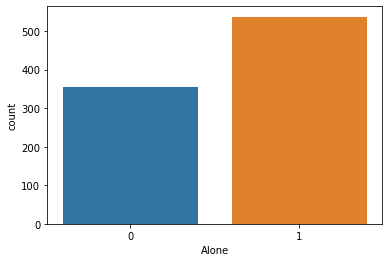

In [52]:
isAlone(df_train)
sns.countplot(df_train["Alone"])
plt.plot()

In [55]:
strat_train.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'], dtype=object)

In [60]:
df_train = strat_train.drop("Survived", axis=1)
df_labels = strat_train['Survived']

In [61]:
df_train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


C:\Users\xuydo\anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

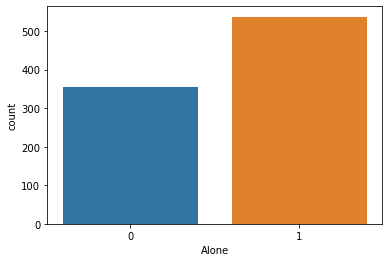

In [64]:
isAlone(df_train)
sns.countplot(df_train["Alone"])
plt.plot()

In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     204 non-null    object 
 6   Embarked  889 non-null    object 
 7   Alone     891 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 55.8+ KB


In [123]:
df_cat = df_train.drop(labels=["Age", "Fare", "Cabin"], axis =1)
df_num = df_train.drop(labels=["Pclass", "Name", "Sex", "Cabin", "Embarked", "Alone"], axis = 1)

In [79]:
df_cat.columns.values

array(['Pclass', 'Name', 'Sex', 'Embarked', 'Alone'], dtype=object)

In [80]:
df_num.columns.values

array(['Age', 'Fare'], dtype=object)

In [82]:
df_cat.isnull().sum()

Pclass      0
Name        0
Sex         0
Embarked    2
Alone       0
dtype: int64

In [90]:
df_cat["Embarked"].mode()[0]

'S'

In [91]:
df_cat.head()

,Pclass,Name,Sex,Embarked,Alone
0,3,"Braund, Mr. Owen Harris",male,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C,0
2,3,"Heikkinen, Miss. Laina",female,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S,0
4,3,"Allen, Mr. William Henry",male,S,1


In [119]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
])

df_cat_tr = cat_pipeline.fit_transform(df_cat)

In [96]:
housing_extra_attribs = pd.DataFrame(
    df_cat_tr,
    columns=list(df_cat.columns),
    index=df_cat.index)
housing_extra_attribs.head()

,Pclass,Name,Sex,Embarked,Alone
0,3,"Braund, Mr. Owen Harris",male,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C,0
2,3,"Heikkinen, Miss. Laina",female,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S,0
4,3,"Allen, Mr. William Henry",male,S,1


In [120]:
def extractName(X):
    X['Title'] = X.Name.str.extract('([A-Za-z]+)\.', expand = False)
    data.drop('Name', axis = 1, inplace=True)

In [124]:
extractName(df_cat)

KeyError: "['Name'] not found in axis"

In [121]:
df_cat.Title.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Title'

In [117]:
unique = df_cat.Title.unique()

In [115]:
df_cat.Title = df_cat.Title.replace(unique, 'Rare')

In [116]:
df_cat.Title.unique()

array(['Rare'], dtype=object)

In [111]:
['Don', "Dona"]

['Don', 'Dona']

In [105]:
strat_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [73]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
titanic_hot = cat_encoder.fit_transform(df_cat)

In [74]:
cat_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S', nan], dtype=object)]

In [10]:
df_num = df_train["Age"]

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class SetReshape(BaseEstimator, TransformerMixin):
    def __int__(self, add=True):
        self.add=add
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.to_numpy().reshape(-1, 1)

reshape = SetReshape()
titanic_num_reshape = reshape.transform(titanic_num)

In [12]:
titanic_num_reshape = reshape.transform(titanic_num)

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(titanic_num_reshape)

SimpleImputer(strategy='median')

In [14]:
imputer.statistics_

array([28.])

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('reshape', reshape),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

titanic_num_tr = num_pipeline.fit_transform(titanic_num)

In [16]:
titanic_num_tr

array([[-0.56573646],
       [ 0.66386103],
       [-0.25833709],
       [ 0.4333115 ],
       [ 0.4333115 ],
       [-0.1046374 ],
       [ 1.89345853],
       [-2.10273333],
       [-0.18148724],
       [-1.18053521],
       [-1.94903364],
       [ 2.2008579 ],
       [-0.71943615],
       [ 0.74071088],
       [-1.18053521],
       [ 1.97030837],
       [-2.10273333],
       [-0.1046374 ],
       [ 0.12591213],
       [-0.1046374 ],
       [ 0.4333115 ],
       [ 0.35646166],
       [-1.10368536],
       [-0.1046374 ],
       [-1.64163427],
       [ 0.66386103],
       [-0.1046374 ],
       [-0.79628599],
       [-0.1046374 ],
       [-0.1046374 ],
       [ 0.81756072],
       [-0.1046374 ],
       [-0.1046374 ],
       [ 2.81565665],
       [-0.1046374 ],
       [ 0.97126041],
       [-0.1046374 ],
       [-0.6425863 ],
       [-0.87313583],
       [-1.18053521],
       [ 0.81756072],
       [-0.18148724],
       [-0.1046374 ],
       [-2.02588348],
       [-0.79628599],
       [-0

In [17]:
from sklearn.compose import ColumnTransformer
num_atrribs = ["Age"]
cat_attribs = list(titanic_cat)


full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_atrribs),
    ("cat", OneHotEncoder(), cat_attribs),

])

titanic_prepared = full_pipeline.fit_transform(titanic)

In [18]:
titanic_prepared.shape

(891, 6)

In [19]:
from sklearn.linear_model import LogisticRegression

lin_reg = LogisticRegression()
lin_reg.fit(titanic_prepared, titanic_labels)

LogisticRegression()

In [20]:
some_data = titanic.iloc[:5]
some_labels = titanic_labels.iloc[:5]

In [21]:
some_data

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


In [22]:
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [0 1 1 1 0]


In [23]:
print("Labels:", list(some_labels))

Labels: [0, 1, 1, 1, 0]


In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

titanic_predictions = lin_reg.predict(titanic_prepared)
lin_mse = mean_squared_error(titanic_labels, titanic_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.44821631782492505

In [25]:
results = titanic_predictions == titanic_labels

In [26]:
results.value_counts()

True     712
False    179
Name: Survived, dtype: int64

In [27]:
test_titanic

,Pclass,Sex,Age
0,3,male,34.5
1,3,female,47.0
2,2,male,62.0
3,3,male,27.0
4,3,female,22.0
...,...,...,...
413,3,male,NaN
414,1,female,39.0
415,3,male,38.5
416,3,male,NaN


In [28]:
data_test_prepared = full_pipeline.transform(test_titanic)

In [32]:
predict = lin_reg.predict(data_test_prepared)

In [35]:
submit = pd.DataFrame({"PassengerId":strat_test.PassengerId, 'Survived':predict})

In [36]:
submit.to_csv("final_submission.csv", index = False)

In [37]:
!kaggle competitions submit -c titanic -f final_submission.csv -m "Message"

Successfully submitted to Titanic - Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|██████████| 3.18k/3.18k [00:00<00:00, 20.0kB/s]
100%|██████████| 3.18k/3.18k [00:01<00:00, 1.85kB/s]
